# **Titanic 데이터를 이용한 <span style="color:darkgreen">머신러닝</span> 문제**
---

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시오.**<br>
> 반드시 코드와 주석을 읽고 문제를 푸시오. <br>
> 반드시 출력된 데이터 설명을 읽고 문제를 푸시오.

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

x, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

print( x.shape, y.shape)
print(y[:4])
x.head()

(1309, 13) (1309,)
0    1
1    1
2    0
3    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
y.unique()

['1', '0']
Categories (2, object): ['1', '0']

# **Q1. x에서 다음의 컬럼을 삭제하시오.**
---------------------------------
**삭제할 컬럼들**
1. name
2. ticket
2. boat
3. body
4. home.dest
---------------------------

In [ ]:
####################
## Your code here ##
####################

x.drop(['name','ticket', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
x.head(3)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S
1,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S
2,1.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S


# Q2. x의 cabin 컬럼을 다음 조건에 맞추어 변형하시오.
-------------------
* 값의 맨 앞글자만 남긴다.
    * 예시) C22 C26 -> C
    * 예시) B5 -> B
* 값이 빈값일 경우, 'N'을 남긴다.
--------------------

In [ ]:
print(x['cabin'][1308]) #NaN : missing value, none : empty

None


In [ ]:
pd.isna(x['cabin'][1308])

True

In [ ]:
def convert(x):
  if pd.isna(x):
    return 'N'
  else:
    return x[0]

x['cabin'] = x['cabin'].apply(convert)

x.head(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,B,S
1,1.0,male,0.9167,1.0,2.0,151.5500,C,S
2,1.0,female,2.0000,1.0,2.0,151.5500,C,S
3,1.0,male,30.0000,1.0,2.0,151.5500,C,S
4,1.0,female,25.0000,1.0,2.0,151.5500,C,S


In [ ]:
x['cabin'][1308]

'N'

In [ ]:
####################
## Your code here ##
####################
x.loc[ x['cabin'].isna(), 'cabin'] = 'N' #missing value 처리
temp = [ cabin[0] for cabin in x['cabin'] ] #가장 앞 알파벳으로 처리
x['cabin'] = temp

x.head(3)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,B,S
1,1.0,male,0.9167,1.0,2.0,151.5500,C,S
2,1.0,female,2.0000,1.0,2.0,151.5500,C,S


# Q3. 다음 조건에 맞추어 x에 새로운 컬럼 fs를 만드시오.
-------------------
* sibsp와 parch의 합을 기준으로
    - 1이하 : 'a' 를 값으로 갖는다.
    - 1초과 4이하 : 'b' 를 값으로 갖는다.
    - 4초과 : 'c' 를 값으로 갖는다.
----------------

In [ ]:
####################
## Your code here ##
####################

temp = x['sibsp'] + x['parch']

def convert(x):
  if x<=1:
    return 'a'
  elif 1<x<=4:
    return 'b'
  else:
    return 'c'
temp = temp.apply(convert)

#temp = pd.cut(temp, bins=[-1, 1, 4, np.inf], labels=['a','b','c'])
x['fs'] = temp

x.head(3)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,fs
0,1.0,female,29.0000,0.0,0.0,211.3375,B,S,a
1,1.0,male,0.9167,1.0,2.0,151.5500,C,S,b
2,1.0,female,2.0000,1.0,2.0,151.5500,C,S,b


In [ ]:
x.fs.unique()

array(['a', 'b', 'c'], dtype=object)

# Q4. x와 y를 트레이닝/벨리데이션/테스트 셋으로 분리하시오.
----------------------
* 변수명 규칙 :
    - x_train, x_valid, x_test
    - y_train, y_valid, y_test
* train : valid : test = 6 : 2 : 2
* random state, seed 등은 2021로 고정
------------------------

In [ ]:
####################
## Your code here ##
####################
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=2021)
x_train, x_valid, y_train, y_valid = tts(x_train, y_train, test_size=2/8, random_state = 2021)

# Q5. 카테고리 데이터들에 빈값이 있다면, 최빈값을 찾아 imputing하시오.
----------------------------
* 모든 전처리 규칙은 트레이닝 셋을 바탕으로 찾는다.
* 대상 컬럼 : pclass, cabin, embarked
* 모든 x들에 대해 진행
----------------------------

In [ ]:
####################
## Your code here ##
####################
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

x_train[['pclass', 'cabin', 'embarked']] = imputer.fit_transform(x_train[['pclass', 'cabin', 'embarked']])
x_valid[['pclass', 'cabin', 'embarked']] = imputer.transform( x_valid[['pclass', 'cabin', 'embarked']] )
x_test[['pclass', 'cabin', 'embarked']] = imputer.transform( x_test[['pclass', 'cabin', 'embarked']] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# Q6. 연속형 데이터들에 빈값이 있다면, 중앙값을 찾아 imputing하시오.
----------------------------
* 모든 전처리 규칙은 트레이닝 셋을 바탕으로 찾는다.
* 대상 컬럼 : age, fare
* 모든 x들에 대해 진행
----------------------------

In [ ]:
####################
## Your code here ##
####################
from sklearn.impute import SimpleImputer

imputer2 = SimpleImputer(strategy='median')

x_train[['age', 'fare']] = imputer2.fit_transform(x_train[['age', 'fare']])
x_valid[['age', 'fare']] = imputer2.transform( x_valid[['age', 'fare']] )
x_test[['age', 'fare']] = imputer2.transform( x_test[['age', 'fare']] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# Q7. 카테고리 데이터들을 dummy 변수화 하시오.
-------------------------------
* 모든 전처리 규칙은 트레이닝셋을 바탕으로 찾는다.
* 대상 컬럼 : pclass, cabin, embarked, fs, sex
* 더미변수를 만든 후, 원본 변수는 삭제한다.
* 모든 x들에 대해 진행
* 카테고리 안에 4개 클래스가 있다면, 3개 컬럼이 만들어져야 한다.
* x_valid와 x_test의 컬럼들은 x_train의 컬럼과 종류와 순서가 같아야 한다.
-------------------------------

get_dummies는 카테고리 수만큼 column이 만들어지는데, 학습데이터에는 없지만 검증데이터에만 있는 데이터값이 있을 수 있습니다. 따라서 검증데이터에 생긴, 학습데이터에 없는 column을 제거하기 위해서 입니다. 

학습데이터 (1,2,3) -> (00,10,01) 검증 (1,2,3,4) = (000,100,010,001) -> 00, 10, 01, 00 (마지막 네번째 column 제거)  

In [ ]:
####################
## Your code here ##
####################
x_train = pd.get_dummies(x_train, columns=['pclass', 'cabin', 'embarked', 'fs', 'sex'], drop_first= True)
x_valid = pd.get_dummies(x_valid, columns=['pclass', 'cabin', 'embarked', 'fs', 'sex'], drop_first= True)
x_test = pd.get_dummies(x_test, columns=['pclass', 'cabin', 'embarked', 'fs', 'sex'], drop_first= True)

x_valid = x_valid[x_train.columns]
x_test = x_test[x_train.columns]

In [ ]:
x_train.head()

,age,sibsp,parch,fare,pclass_2.0,pclass_3.0,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_N,embarked_Q,embarked_S,fs_b,fs_c,sex_male
442,24.0,2.0,0.0,73.5000,1,0,0,0,0,0,0,0,1,0,1,1,0,1
260,40.0,0.0,0.0,153.4625,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1212,28.0,0.0,0.0,7.8958,0,1,0,0,0,0,0,0,1,0,1,0,0,1
719,18.0,0.0,0.0,8.0500,0,1,0,0,0,0,0,0,1,0,1,0,0,1
780,23.0,0.0,0.0,8.0500,0,1,0,0,0,0,0,0,1,0,1,0,0,0


# Q8. 다음 조건에 맞추어 의사결정나무들을 학습시키시오.
-----------------------
* max depth는 3으로 고정한다.
* min samples leaf 1개짜리 나무부터 1개씩 늘려서 min samples leaf가 30개인 나무까지, 총 30개의 의사결정 나무를 학습시킨다.
* 학습된 의사결정나무들은 trees 변수에 리스트로 담아둔다.
-----------------------

In [ ]:
####################
## Your code here ##
####################

from sklearn.tree import DecisionTreeClassifier

trees = []

for i in range(30):
    dtr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=i+1)
    dtr.fit(x_train, y_train)
    trees.append(dtr)

# Q9. 학습된 의사결정나무들의 성능을 벨리데이션셋에서 시각화 하시오.
-------------------
* y가 1 (생존)일 때를 positive, 0 (사망)일 때를 negative로 둔다.
* 벨리데이션 셋에서 sensitivity를 계산하여 시각화 한다.
* x축은 min sample leaf의 수, y축은 sensitivity
* line chart를 그린다.
* grid line을 추가한다.
--------------------

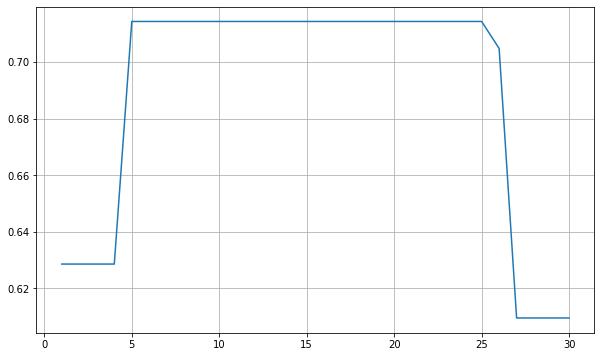

In [ ]:
####################
## Your code here ##
####################

sensitivities = []

for i in range(1, 31):
    dtr = trees[i-1]
    y_pred = dtr.predict(x_valid)

    denominator = y_valid.astype(int).sum()
    numerator = y_pred[y_valid == "1"].astype(int).sum()

    sensitivities.append( numerator/denominator   )

plt.figure(figsize=(10,6))
plt.plot(range(1,31), sensitivities)
plt.grid()
plt.show()

# Q10. Q9를 참고하여 가장 성능 좋은 (동일 성능이라면 가장 min sample leaf가 큰) 나무를 골라 테스트셋 위에서 평가하시오.
----------------
1. accuracy를 주석으로 명시하시오.
2. 1을 positive로 두었을 때, sensitivity를 주석으로 명시하시오.
3. 1을 positive로 두었을 때, specificity를 주석으로 명시하시오.

In [ ]:
####################
## Your code here ##
####################

from sklearn.metrics import classification_report

best_tree = trees[24]
y_pred = best_tree.predict(x_test)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# accuracy : 83%
# sensitivity : 81% 
# specificity : 84%

'''
Note that in binary classification, 
recall of the positive class is also known as “sensitivity”; 
recall of the negative class is “specificity”.
'''

              precision    recall  f1-score   support

    negative       0.88      0.84      0.86       160
    positive       0.77      0.81      0.79       102

    accuracy                           0.83       262
   macro avg       0.82      0.83      0.83       262
weighted avg       0.83      0.83      0.83       262



'\nNote that in binary classification, \nrecall of the positive class is also known as “sensitivity”; \nrecall of the negative class is “specificity”.\n'